# Aggregate probability of antibiotic prescribing stratified by predicted risk level

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from datetime import date
from operator import attrgetter
from contextlib import redirect_stdout
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## 1- Function

In [2]:
def read_process_ab_probs(infection, infection_type):
    #read csv file
    data = pd.read_csv(f'../output/hospitalisation_prediction_'+infection+'/prob_pred_bin_'+infection+'_'+infection_type+'.csv')
    #add a column of infection type 
    data['infection'] = infection+'_'+infection_type
    #add a column of deciles
    data['decile'] = data.index + 1
    #keep 3 digits in pred_mean and ab_prob_mean
    data[['pred_mean', 'ab_prob_mean']] = np.round(data[['pred_mean', 'ab_prob_mean']], decimals=3)
    #keep required columns
    data_req = data[['infection', 'bins', 'decile', 'pred_mean', 'ab_prob_mean']]

    return data_req

## 2- Read and process data
### 2-1- all

In [3]:
#read and process probs
data_lrti_incdt = read_process_ab_probs('lrti', 'incdt')
data_lrti_prevl = read_process_ab_probs('lrti', 'prevl')
data_urti_combined_incdt = read_process_ab_probs('urti_combined', 'incdt')
data_urti_combined_prevl = read_process_ab_probs('urti_combined', 'prevl')
data_uti_incdt = read_process_ab_probs('uti', 'incdt')
data_uti_prevl = read_process_ab_probs('uti', 'prevl')
data_sinusitis_incdt = read_process_ab_probs('sinusitis', 'incdt')
# data_sinusitis_prevl = read_process_ab_probs('sinusitis', 'prevl')
data_ot_externa_incdt = read_process_ab_probs('ot_externa', 'incdt')
data_ot_externa_prevl = read_process_ab_probs('ot_externa', 'prevl')
data_otmedia_incdt = read_process_ab_probs('otmedia', 'incdt')
data_otmedia_prevl = read_process_ab_probs('otmedia', 'prevl')
data_urti_incdt = read_process_ab_probs('urti', 'incdt')
data_urti_prevl = read_process_ab_probs('urti', 'prevl')
data_cough_incdt = read_process_ab_probs('cough', 'incdt')
data_cough_prevl = read_process_ab_probs('cough', 'prevl')
data_cough_cold_incdt = read_process_ab_probs('cough_cold', 'incdt')
data_cough_cold_prevl = read_process_ab_probs('cough_cold', 'prevl')
data_throat_incdt = read_process_ab_probs('throat', 'incdt')
data_throat_prevl = read_process_ab_probs('throat', 'prevl')

#append probs of all infections
data = data_lrti_incdt.append([data_lrti_prevl, data_urti_combined_incdt, data_urti_combined_prevl, data_uti_incdt, data_uti_prevl, data_sinusitis_incdt, data_otmedia_incdt, data_otmedia_prevl, data_ot_externa_incdt, data_ot_externa_prevl, data_urti_incdt, data_urti_prevl, data_cough_incdt, data_cough_prevl, data_cough_cold_incdt, data_cough_cold_prevl, data_throat_incdt, data_throat_prevl], ignore_index=True)
#save
data.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_all.csv', index=False)
data

infection                bins  decile  pred_mean  ab_prob_mean
0      lrti_incdt  (0.00113, 0.00431]       1      0.004         0.096
1      lrti_incdt  (0.00431, 0.00485]       2      0.005         0.096
2      lrti_incdt  (0.00485, 0.00529]       3      0.005         0.097
3      lrti_incdt  (0.00529, 0.00569]       4      0.005         0.104
4      lrti_incdt  (0.00569, 0.00609]       5      0.006         0.104
..            ...                 ...     ...        ...           ...
185  throat_prevl  (0.00336, 0.00422]       6      0.004         0.094
186  throat_prevl  (0.00422, 0.00546]       7      0.005         0.093
187  throat_prevl  (0.00546, 0.00736]       8      0.006         0.122
188  throat_prevl   (0.00736, 0.0112]       9      0.009         0.114
189  throat_prevl     (0.0112, 0.137]      10      0.019         0.095

[190 rows x 5 columns]

### 2-2- Pre-pandemic

In [4]:
#read and process probs
data_lrti_incdt_prepandemic = read_process_ab_probs('lrti', 'incdt_prepandemic')
data_lrti_prevl_prepandemic = read_process_ab_probs('lrti', 'prevl_prepandemic')
data_urti_combined_incdt_prepandemic = read_process_ab_probs('urti_combined', 'incdt_prepandemic')
data_urti_combined_prevl_prepandemic = read_process_ab_probs('urti_combined', 'prevl_prepandemic')
data_uti_incdt_prepandemic = read_process_ab_probs('uti', 'incdt_prepandemic')
data_uti_prevl_prepandemic = read_process_ab_probs('uti', 'prevl_prepandemic')
data_sinusitis_incdt_prepandemic = read_process_ab_probs('sinusitis', 'incdt_prepandemic')
# data_sinusitis_prevl_prepandemic = read_process_ab_probs('sinusitis', 'prevl_prepandemic')
data_ot_externa_incdt_prepandemic = read_process_ab_probs('ot_externa', 'incdt_prepandemic')
data_ot_externa_prevl_prepandemic = read_process_ab_probs('ot_externa', 'prevl_prepandemic')
data_otmedia_incdt_prepandemic = read_process_ab_probs('otmedia', 'incdt_prepandemic')
data_otmedia_prevl_prepandemic = read_process_ab_probs('otmedia', 'prevl_prepandemic')
data_urti_incdt_prepandemic = read_process_ab_probs('urti', 'incdt_prepandemic')
data_urti_prevl_prepandemic = read_process_ab_probs('urti', 'prevl_prepandemic')
data_cough_incdt_prepandemic = read_process_ab_probs('cough', 'incdt_prepandemic')
data_cough_prevl_prepandemic = read_process_ab_probs('cough', 'prevl_prepandemic')
data_cough_cold_incdt_prepandemic = read_process_ab_probs('cough_cold', 'incdt_prepandemic')
data_cough_cold_prevl_prepandemic = read_process_ab_probs('cough_cold', 'prevl_prepandemic')
data_throat_incdt_prepandemic = read_process_ab_probs('throat', 'incdt_prepandemic')
data_throat_prevl_prepandemic = read_process_ab_probs('throat', 'prevl_prepandemic')

#append probs of all infections
data_prepandemic = data_lrti_incdt_prepandemic.append([data_lrti_prevl_prepandemic, data_urti_combined_incdt_prepandemic, data_urti_combined_prevl_prepandemic, data_uti_incdt_prepandemic, data_uti_prevl_prepandemic, data_sinusitis_incdt_prepandemic, data_otmedia_incdt_prepandemic, data_otmedia_prevl_prepandemic, data_ot_externa_incdt_prepandemic, data_ot_externa_prevl_prepandemic, data_urti_incdt_prepandemic, data_urti_prevl_prepandemic, data_cough_incdt_prepandemic, data_cough_prevl_prepandemic, data_cough_cold_incdt_prepandemic, data_cough_cold_prevl_prepandemic, data_throat_incdt_prepandemic, data_throat_prevl_prepandemic], ignore_index=True)
#save
data_prepandemic.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_prepandemic.csv', index=False)
data_prepandemic

infection                  bins  decile  pred_mean  \
0      lrti_incdt_prepandemic  (-0.000714, 0.00196]       1      0.001   
1      lrti_incdt_prepandemic    (0.00196, 0.00272]       2      0.002   
2      lrti_incdt_prepandemic    (0.00272, 0.00334]       3      0.003   
3      lrti_incdt_prepandemic    (0.00334, 0.00395]       4      0.004   
4      lrti_incdt_prepandemic    (0.00395, 0.00462]       5      0.004   
..                        ...                   ...     ...        ...   
185  throat_prevl_prepandemic  (6.64e-12, 2.63e-11]       6      0.000   
186  throat_prevl_prepandemic  (2.63e-11, 8.67e-11]       7      0.000   
187  throat_prevl_prepandemic  (8.67e-11, 8.62e-10]       8      0.000   
188  throat_prevl_prepandemic   (8.62e-10, 0.00438]       9      0.001   
189  throat_prevl_prepandemic      (0.00438, 0.956]      10      0.041   

     ab_prob_mean  
0           0.092  
1           0.093  
2           0.111  
3           0.104  
4           0.095  
..            ...  
185         0.088  
186         0.086  
187         0.134  
188         0.107  
189         0.090  

[190 rows x 5 columns]

### 2-3- During pandemic

In [5]:
#read and process probs
data_lrti_incdt_during_pandemic = read_process_ab_probs('lrti', 'incdt_during_pandemic')
data_lrti_prevl_during_pandemic = read_process_ab_probs('lrti', 'prevl_during_pandemic')
data_urti_combined_incdt_during_pandemic = read_process_ab_probs('urti_combined', 'incdt_during_pandemic')
data_urti_combined_prevl_during_pandemic = read_process_ab_probs('urti_combined', 'prevl_during_pandemic')
data_uti_incdt_during_pandemic = read_process_ab_probs('uti', 'incdt_during_pandemic')
data_uti_prevl_during_pandemic = read_process_ab_probs('uti', 'prevl_during_pandemic')
data_sinusitis_incdt_during_pandemic = read_process_ab_probs('sinusitis', 'incdt_during_pandemic')
# data_sinusitis_prevl_during_pandemic = read_process_ab_probs('sinusitis', 'prevl_during_pandemic')
data_ot_externa_incdt_during_pandemic = read_process_ab_probs('ot_externa', 'incdt_during_pandemic')
data_ot_externa_prevl_during_pandemic = read_process_ab_probs('ot_externa', 'prevl_during_pandemic')
data_otmedia_incdt_during_pandemic = read_process_ab_probs('otmedia', 'incdt_during_pandemic')
# data_otmedia_prevl_during_pandemic = read_process_ab_probs('otmedia', 'prevl_during_pandemic')
# data_urti_incdt_during_pandemic = read_process_ab_probs('urti', 'incdt_during_pandemic')
# data_urti_prevl_during_pandemic = read_process_ab_probs('urti', 'prevl_during_pandemic')
data_cough_incdt_during_pandemic = read_process_ab_probs('cough', 'incdt_during_pandemic')
data_cough_prevl_during_pandemic = read_process_ab_probs('cough', 'prevl_during_pandemic')
data_cough_cold_incdt_during_pandemic = read_process_ab_probs('cough_cold', 'incdt_during_pandemic')
data_cough_cold_prevl_during_pandemic = read_process_ab_probs('cough_cold', 'prevl_during_pandemic')
data_throat_incdt_during_pandemic = read_process_ab_probs('throat', 'incdt_during_pandemic')
data_throat_prevl_during_pandemic = read_process_ab_probs('throat', 'prevl_during_pandemic')

#append probs of all infections
data_during_pandemic = data_lrti_incdt_during_pandemic.append([data_lrti_prevl_during_pandemic, data_urti_combined_incdt_during_pandemic, data_urti_combined_prevl_during_pandemic, data_uti_incdt_during_pandemic, data_uti_prevl_during_pandemic, data_sinusitis_incdt_during_pandemic, data_otmedia_incdt_during_pandemic, data_ot_externa_incdt_during_pandemic, data_ot_externa_prevl_during_pandemic, data_cough_incdt_during_pandemic, data_cough_prevl_during_pandemic, data_cough_cold_incdt_during_pandemic, data_cough_cold_prevl_during_pandemic, data_throat_incdt_during_pandemic, data_throat_prevl_during_pandemic], ignore_index=True)
#save
data_during_pandemic.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_during_pandemic.csv', index=False)
data_during_pandemic

infection                                bins  decile  \
0      lrti_incdt_during_pandemic  (-0.00015800000000000005, 0.00317]       1   
1      lrti_incdt_during_pandemic                  (0.00317, 0.00388]       2   
2      lrti_incdt_during_pandemic                  (0.00388, 0.00448]       3   
3      lrti_incdt_during_pandemic                  (0.00448, 0.00508]       4   
4      lrti_incdt_during_pandemic                  (0.00508, 0.00569]       5   
..                            ...                                 ...     ...   
155  throat_prevl_during_pandemic                  (0.00152, 0.00265]       6   
156  throat_prevl_during_pandemic                  (0.00265, 0.00451]       7   
157  throat_prevl_during_pandemic                  (0.00451, 0.00842]       8   
158  throat_prevl_during_pandemic                   (0.00842, 0.0194]       9   
159  throat_prevl_during_pandemic                     (0.0194, 0.289]      10   

     pred_mean  ab_prob_mean  
0        0.003         0.096  
1        0.004         0.099  
2        0.004         0.100  
3        0.005         0.098  
4        0.005         0.096  
..         ...           ...  
155      0.002         0.084  
156      0.003         0.077  
157      0.006         0.126  
158      0.013         0.091  
159      0.050         0.114  

[160 rows x 5 columns]

### 2-4- After 2nd lockdown

In [6]:
#read and process probs
data_lrti_incdt_post_2nd_lockdown = read_process_ab_probs('lrti', 'incdt_post_2nd_lockdown')
data_lrti_prevl_post_2nd_lockdown = read_process_ab_probs('lrti', 'prevl_post_2nd_lockdown')
data_urti_combined_incdt_post_2nd_lockdown = read_process_ab_probs('urti_combined', 'incdt_post_2nd_lockdown')
data_urti_combined_prevl_post_2nd_lockdown = read_process_ab_probs('urti_combined', 'prevl_post_2nd_lockdown')
data_uti_incdt_post_2nd_lockdown = read_process_ab_probs('uti', 'incdt_post_2nd_lockdown')
data_uti_prevl_post_2nd_lockdown = read_process_ab_probs('uti', 'prevl_post_2nd_lockdown')
# data_sinusitis_incdt_post_2nd_lockdown = read_process_ab_probs('sinusitis', 'incdt_post_2nd_lockdown')
# data_sinusitis_prevl_post_2nd_lockdown = read_process_ab_probs('sinusitis', 'prevl_post_2nd_lockdown')
data_ot_externa_incdt_post_2nd_lockdown = read_process_ab_probs('ot_externa', 'incdt_post_2nd_lockdown')
data_ot_externa_prevl_post_2nd_lockdown = read_process_ab_probs('ot_externa', 'prevl_post_2nd_lockdown')
data_otmedia_incdt_post_2nd_lockdown = read_process_ab_probs('otmedia', 'incdt_post_2nd_lockdown')
data_otmedia_prevl_post_2nd_lockdown = read_process_ab_probs('otmedia', 'prevl_post_2nd_lockdown')
data_urti_incdt_post_2nd_lockdown = read_process_ab_probs('urti', 'incdt_post_2nd_lockdown')
data_urti_prevl_post_2nd_lockdown = read_process_ab_probs('urti', 'prevl_post_2nd_lockdown')
data_cough_incdt_post_2nd_lockdown = read_process_ab_probs('cough', 'incdt_post_2nd_lockdown')
data_cough_prevl_post_2nd_lockdown = read_process_ab_probs('cough', 'prevl_post_2nd_lockdown')
data_cough_cold_incdt_post_2nd_lockdown = read_process_ab_probs('cough_cold', 'incdt_post_2nd_lockdown')
data_cough_cold_prevl_post_2nd_lockdown = read_process_ab_probs('cough_cold', 'prevl_post_2nd_lockdown')
data_throat_incdt_post_2nd_lockdown = read_process_ab_probs('throat', 'incdt_post_2nd_lockdown')
data_throat_prevl_post_2nd_lockdown = read_process_ab_probs('throat', 'prevl_post_2nd_lockdown')

#append probs of all infections
data_post_2nd_lockdown = data_lrti_incdt_post_2nd_lockdown.append([data_lrti_prevl_post_2nd_lockdown, data_urti_combined_incdt_post_2nd_lockdown, data_urti_combined_prevl_post_2nd_lockdown, data_uti_incdt_post_2nd_lockdown, data_uti_prevl_post_2nd_lockdown, data_otmedia_incdt_post_2nd_lockdown, data_otmedia_prevl_post_2nd_lockdown, data_ot_externa_incdt_post_2nd_lockdown, data_ot_externa_prevl_post_2nd_lockdown, data_urti_incdt_post_2nd_lockdown, data_urti_prevl_post_2nd_lockdown, data_cough_incdt_post_2nd_lockdown, data_cough_prevl_post_2nd_lockdown, data_cough_cold_incdt_post_2nd_lockdown, data_cough_cold_prevl_post_2nd_lockdown, data_throat_incdt_post_2nd_lockdown, data_throat_prevl_post_2nd_lockdown], ignore_index=True)
#save
data_post_2nd_lockdown.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_post_2nd_lockdown.csv', index=False)
data_post_2nd_lockdown

infection                                bins  \
0      lrti_incdt_post_2nd_lockdown  (-0.00011900000000000007, 0.00345]   
1      lrti_incdt_post_2nd_lockdown                   (0.00345, 0.0043]   
2      lrti_incdt_post_2nd_lockdown                   (0.0043, 0.00506]   
3      lrti_incdt_post_2nd_lockdown                  (0.00506, 0.00576]   
4      lrti_incdt_post_2nd_lockdown                  (0.00576, 0.00648]   
..                              ...                                 ...   
175  throat_prevl_post_2nd_lockdown                  (0.00266, 0.00371]   
176  throat_prevl_post_2nd_lockdown                  (0.00371, 0.00525]   
177  throat_prevl_post_2nd_lockdown                  (0.00525, 0.00779]   
178  throat_prevl_post_2nd_lockdown                   (0.00779, 0.0133]   
179  throat_prevl_post_2nd_lockdown                      (0.0133, 0.15]   

     decile  pred_mean  ab_prob_mean  
0         1      0.003         0.097  
1         2      0.004         0.097  
2         3      0.005         0.100  
3         4      0.005         0.104  
4         5      0.006         0.099  
..      ...        ...           ...  
175       6      0.003         0.094  
176       7      0.004         0.091  
177       8      0.006         0.110  
178       9      0.010         0.105  
179      10      0.025         0.104  

[180 rows x 5 columns]

In [7]:
data_sel = data_lrti_incdt.append([data_lrti_prevl, data_urti_combined_incdt, data_urti_combined_prevl, data_uti_incdt, data_uti_prevl], ignore_index=True)
data_sel

infection                               bins  decile  pred_mean  \
0            lrti_incdt                 (0.00113, 0.00431]       1      0.004   
1            lrti_incdt                 (0.00431, 0.00485]       2      0.005   
2            lrti_incdt                 (0.00485, 0.00529]       3      0.005   
3            lrti_incdt                 (0.00529, 0.00569]       4      0.005   
4            lrti_incdt                 (0.00569, 0.00609]       5      0.006   
5            lrti_incdt                 (0.00609, 0.00651]       6      0.006   
6            lrti_incdt                 (0.00651, 0.00697]       7      0.007   
7            lrti_incdt                 (0.00697, 0.00753]       8      0.007   
8            lrti_incdt                 (0.00753, 0.00838]       9      0.008   
9            lrti_incdt                  (0.00838, 0.0149]      10      0.009   
10           lrti_prevl  (-0.0008860000000000001, 0.00173]       1      0.001   
11           lrti_prevl                 (0.00173, 0.00259]       2      0.002   
12           lrti_prevl                  (0.00259, 0.0033]       3      0.003   
13           lrti_prevl                  (0.0033, 0.00407]       4      0.004   
14           lrti_prevl                 (0.00407, 0.00488]       5      0.004   
15           lrti_prevl                 (0.00488, 0.00591]       6      0.005   
16           lrti_prevl                 (0.00591, 0.00715]       7      0.006   
17           lrti_prevl                 (0.00715, 0.00892]       8      0.008   
18           lrti_prevl                  (0.00892, 0.0123]       9      0.010   
19           lrti_prevl                   (0.0123, 0.0686]      10      0.018   
20  urti_combined_incdt   (0.0029899999999999996, 0.00552]       1      0.005   
21  urti_combined_incdt                 (0.00552, 0.00583]       2      0.006   
22  urti_combined_incdt                 (0.00583, 0.00606]       3      0.006   
23  urti_combined_incdt                 (0.00606, 0.00626]       4      0.006   
24  urti_combined_incdt                 (0.00626, 0.00646]       5      0.006   
25  urti_combined_incdt                 (0.00646, 0.00666]       6      0.007   
26  urti_combined_incdt                 (0.00666, 0.00688]       7      0.007   
27  urti_combined_incdt                 (0.00688, 0.00714]       8      0.007   
28  urti_combined_incdt                 (0.00714, 0.00751]       9      0.007   
29  urti_combined_incdt                  (0.00751, 0.0107]      10      0.008   
30  urti_combined_prevl                 (0.00017, 0.00349]       1      0.003   
31  urti_combined_prevl                 (0.00349, 0.00416]       2      0.004   
32  urti_combined_prevl                 (0.00416, 0.00471]       3      0.004   
33  urti_combined_prevl                 (0.00471, 0.00522]       4      0.005   
34  urti_combined_prevl                 (0.00522, 0.00575]       5      0.005   
35  urti_combined_prevl                 (0.00575, 0.00633]       6      0.006   
36  urti_combined_prevl                 (0.00633, 0.00701]       7      0.007   
37  urti_combined_prevl                 (0.00701, 0.00787]       8      0.007   
38  urti_combined_prevl                 (0.00787, 0.00925]       9      0.008   
39  urti_combined_prevl                  (0.00925, 0.0232]      10      0.011   
40            uti_incdt                 (0.00147, 0.00484]       1      0.004   
41            uti_incdt                 (0.00484, 0.00535]       2      0.005   
42            uti_incdt                 (0.00535, 0.00574]       3      0.006   
43            uti_incdt                 (0.00574, 0.00609]       4      0.006   
44            uti_incdt                 (0.00609, 0.00643]       5      0.006   
45            uti_incdt                 (0.00643, 0.00679]       6      0.007   
46            uti_incdt                 (0.00679, 0.00719]       7      0.007   
47            uti_incdt                 (0.00719, 0.00766]       8      0.007   
48            uti_incdt                 (0.00

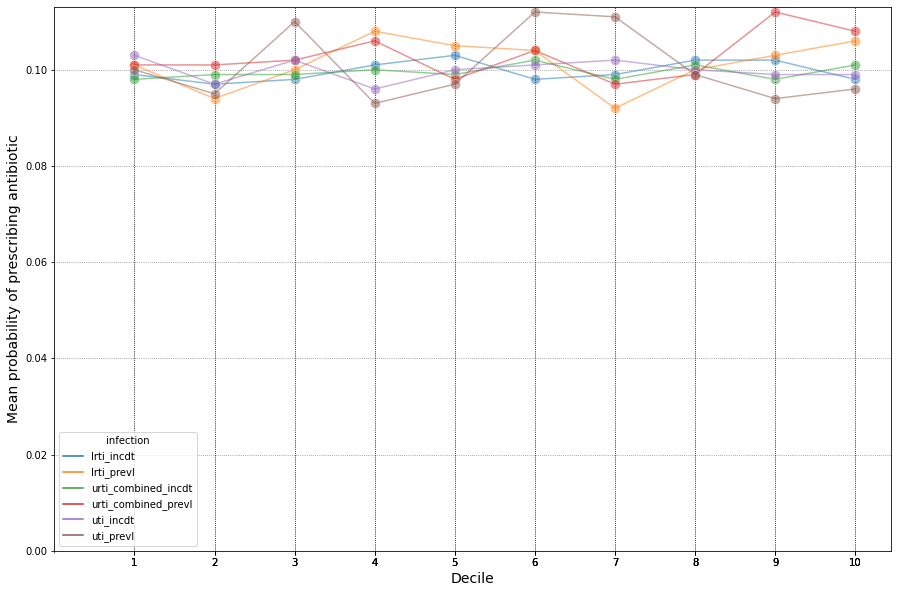

In [24]:
plt.figure(figsize=(15,10))
# sns.lineplot(x="decile", data=data_sel, y="ab_prob_mean",  hue="infection", marker='*', linestyle='--', markersize=10)
g = sns.lineplot(x='decile', y='ab_prob_mean', data=data_sel, hue='infection', marker='o', markersize=10)

plt.ylim(0)#, data.pred_mean_train.max() + data.pred_mean_train.max()/3)
plt.xlim(0)#, data.ab_prob_mean_train.max() + data.ab_prob_mean_train.max()/3)
plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean probability of prescribing antibiotic', fontsize=14)
plt.gca().set_xticks(np.arange(0,10,1), minor=True)
plt.grid(b=True, which='major', color='k', linestyle=':', alpha=0.5)
plt.grid(which='minor', color='k', linestyle=':', alpha=0.5)
plt.xticks(data_sel.decile)
# plt.legend([],[], frameon=False)
# plt.savefig('../output/aggregate_ab_prob/aggregate_ab_prob_incdt.jpg')
plt.show()